# Setup

**IMPORTANT: If you have the DL Group Project Folder in your "Shared with me", add a shortcut to your My Drive for the setup to work.**

In [13]:
import torch

# make sure GPU is being used
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
else:
    print("No GPU detected")

GPU: NVIDIA GeForce RTX 3070 Ti


In [15]:
# Install necessary tools
# !sudo apt-get update
# !sudo apt-get install -y build-essential openmpi-bin libopenmpi-dev

# Navigate to the src directory and compile
!cd "EternaFold/src" && make

# Alternatively, for multithreaded version - gives me problems
# !cd "EternaFold/src" && make multi

!pip3 install "mxfold2-0.1.2-cp310-cp310-manylinux_2_17_x86_64.whl"
# or you can use poetry install from the mxfold2 directory

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
make all CXX="mpiCC" OTHERFLAGS="-DMULTI"
make[1]: Entering directory '/home/ianjjhsiao/omcs/DeepLearning/dl_final_project/EternaFold/src'
make[1]: Nothing to be done for 'all'.
make[1]: Leaving directory '/home/ianjjhsiao/omcs/DeepLearning/dl_final_project/EternaFold/src'


In [33]:
import os
print(os.getcwd())
os.chdir('RNA-Secondary-Structure-Prediction')

/home/ianjjhsiao/omcs/DeepLearning/dl_final_project/RNA-Secondary-Structure-Prediction


FileNotFoundError: [Errno 2] No such file or directory: 'RNA-Secondary-Structure-Prediction'

# Verify Installation

In [52]:
seq = "GCCUGUGCGUAAGUGCAGGC"
!chmod +x "EternaFold/src/contrafold"
!./EternaFold/src/contrafold predict "EternaFold/test.seq" --params "EternaFold/parameters/EternaFoldParams.v1"

with open("test.fa", "w") as f:
    f.write(">TestSequence\n")
    f.write(f"{seq}\n")

!mxfold2 predict test.fa
!rm test.fa

from ViennaRNA import RNA
# https://www.tbi.univie.ac.at/RNA/ViennaRNA/refman/api_python.html#usage
seq = "GCCUGUGCGUAAGUGCAGGC"
fc  = RNA.fold_compound(seq)
(ss, mfe) = fc.mfe()

print(f"{seq}\n{ss} ({mfe:6.2f})")

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
Training mode: 
Use constraints: 0
Use evidence: 0
Predicting using MEA estimator.
>EternaFold/test.seq
CGCUGUCUGUACUUGUAUCAGUACACUGACGAGUCCCUAAAGGACGAAACAGCG
>structure
(((((((((((((......))))))..)....((((.....))))...))))))
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
>TestSequence
GCCUGUGCGUAAGUGCAGGC
((((((((....)))))))) (13.1)
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
GCCUGUGCGUAAGUGCAGGC
((((((((....)))))))) (-12.30)


In [35]:
# uses eterna fold to predict on train data
import glob
import subprocess

input_folder = "EternaFold/input_data/StructureData/train/"
output_folder = "EternaFold/input_data/StructureData/eterna_predict_on_train"

# Get all .bpseq files in the input folder
bpseq_files = glob.glob(f"{input_folder}*.bpseq")

command = ["./EternaFold/src/contrafold", "predict"] + bpseq_files + ["--parens", output_folder]

subprocess.run(command)

['EternaFold/input_data/StructureData/train/CRW_00112.bpseq', 'EternaFold/input_data/StructureData/train/CRW_00242.bpseq', 'EternaFold/input_data/StructureData/train/ASE_00407.bpseq', 'EternaFold/input_data/StructureData/train/CRW_00394.bpseq', 'EternaFold/input_data/StructureData/train/CRW_00198.bpseq', 'EternaFold/input_data/StructureData/train/ASE_00106.bpseq', 'EternaFold/input_data/StructureData/train/RFA_00292.bpseq', 'EternaFold/input_data/StructureData/train/ASE_00080.bpseq', 'EternaFold/input_data/StructureData/train/ASE_00312.bpseq', 'EternaFold/input_data/StructureData/train/SPR_00345.bpseq', 'EternaFold/input_data/StructureData/train/RFA_00050.bpseq', 'EternaFold/input_data/StructureData/train/ASE_00136.bpseq', 'EternaFold/input_data/StructureData/train/PDB_00133.bpseq', 'EternaFold/input_data/StructureData/train/ASE_00210.bpseq', 'EternaFold/input_data/StructureData/train/CRW_00503.bpseq', 'EternaFold/input_data/StructureData/train/RFA_00368.bpseq', 'EternaFold/input_data/

Training mode: 
Use constraints: 0
Use evidence: 0


Predicting using MEA estimator.
Predicting using MEA estimator.
Predicting using MEA estimator.
Predicting using MEA estimator.
Predicting using MEA estimator.
Predicting using MEA estimator.
Predicting using MEA estimator.
Predicting using MEA estimator.
Predicting using MEA estimator.
Predicting using MEA estimator.
Predicting using MEA estimator.
Predicting using MEA estimator.
Predicting using MEA estimator.
Predicting using MEA estimator.
Predicting using MEA estimator.
Predicting using MEA estimator.
Predicting using MEA estimator.
Predicting using MEA estimator.
Predicting using MEA estimator.
Predicting using MEA estimator.
Predicting using MEA estimator.
Predicting using MEA estimator.
Predicting using MEA estimator.
Predicting using MEA estimator.
Predicting using MEA estimator.
Predicting using MEA estimator.
Predicting using MEA estimator.
Predicting using MEA estimator.
Predicting using MEA estimator.
Predicting using MEA estimator.
Predicting using MEA estimator.
Predicti

CompletedProcess(args=['./EternaFold/src/contrafold', 'predict', 'EternaFold/input_data/StructureData/train/CRW_00112.bpseq', 'EternaFold/input_data/StructureData/train/CRW_00242.bpseq', 'EternaFold/input_data/StructureData/train/ASE_00407.bpseq', 'EternaFold/input_data/StructureData/train/CRW_00394.bpseq', 'EternaFold/input_data/StructureData/train/CRW_00198.bpseq', 'EternaFold/input_data/StructureData/train/ASE_00106.bpseq', 'EternaFold/input_data/StructureData/train/RFA_00292.bpseq', 'EternaFold/input_data/StructureData/train/ASE_00080.bpseq', 'EternaFold/input_data/StructureData/train/ASE_00312.bpseq', 'EternaFold/input_data/StructureData/train/SPR_00345.bpseq', 'EternaFold/input_data/StructureData/train/RFA_00050.bpseq', 'EternaFold/input_data/StructureData/train/ASE_00136.bpseq', 'EternaFold/input_data/StructureData/train/PDB_00133.bpseq', 'EternaFold/input_data/StructureData/train/ASE_00210.bpseq', 'EternaFold/input_data/StructureData/train/CRW_00503.bpseq', 'EternaFold/input_da

In [47]:
# converts bpseq files to fasta
import glob
def bpseq_to_fasta(bpseq_file, fasta_file):
    """
    Convert BPSEQ format to FASTA format.
    :param bpseq_file: Input BPSEQ file path.
    :param fasta_file: Output FASTA file path.
    """
    with open(bpseq_file, 'r') as bpseq:
        lines = bpseq.readlines()
        # Extract sequence from the third column
        sequence = ''.join(line.split()[1] for line in lines if line.strip())
    
    with open(fasta_file, 'w') as fasta:
        fasta.write(f">sequence\n{sequence}\n")
group = 'train'
input_folder = f"EternaFold/input_data/StructureData/{group}/"
output_folder = f"EternaFold/input_data/StructureData/{group}_fasta"

# Get all .bpseq files in the input folder
bpseq_files = glob.glob(f"{input_folder}*.bpseq")
for f in bpseq_files:
    bpseq_to_fasta(f, f'{output_folder}/{os.path.splitext(os.path.basename(f))[0]}.fa')

In [ ]:
# uses mxfold2 to predict on train data
group = 'train'
input_folder = f"EternaFold/input_data/StructureData/{group}_fasta/"
output_folder = f"EternaFold/input_data/StructureData/mxfold2_predict_on_{group}"
fasta_files = glob.glob(f"{input_folder}*.fa")
for f in fasta_files:
    output_file = f"{output_folder}/{os.path.splitext(os.path.basename(f))[0]}.dbn"
    cmd = f"mxfold2 predict {f} > {output_file}"
    os.system(cmd)

['EternaFold/input_data/StructureData/train_fasta/RFA_00392.fa', 'EternaFold/input_data/StructureData/train_fasta/CRW_00409.fa', 'EternaFold/input_data/StructureData/train_fasta/CRW_00533.fa', 'EternaFold/input_data/StructureData/train_fasta/RFA_00235.fa', 'EternaFold/input_data/StructureData/train_fasta/SPR_00321.fa', 'EternaFold/input_data/StructureData/train_fasta/RFA_00373.fa', 'EternaFold/input_data/StructureData/train_fasta/RFA_00131.fa', 'EternaFold/input_data/StructureData/train_fasta/CRW_00424.fa', 'EternaFold/input_data/StructureData/train_fasta/RFA_00303.fa', 'EternaFold/input_data/StructureData/train_fasta/RFA_00236.fa', 'EternaFold/input_data/StructureData/train_fasta/ASE_00146.fa', 'EternaFold/input_data/StructureData/train_fasta/CRW_00124.fa', 'EternaFold/input_data/StructureData/train_fasta/PDB_00221.fa', 'EternaFold/input_data/StructureData/train_fasta/RFA_00027.fa', 'EternaFold/input_data/StructureData/train_fasta/RFA_00298.fa', 'EternaFold/input_data/StructureData/tr

/content/ViennaRNA-2.4.18

# Import Data Sets

In [37]:
def parse_bpseq(file_path):
    """
    Parses a BPSEQ file and extracts the sequence and pairing information.
    """
    sequence = []
    pairing = []

    with open(file_path, 'r',  encoding='latin-1') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 3:
                _, base, pair = parts
                sequence.append(base)
                pairing.append(int(pair))

    return ''.join(sequence), pairing

def generate_dot_bracket(pairing):
    """
    Converts pairing information into dot-bracket notation.
    """
    dot_bracket = ['.'] * len(pairing)
    stack = {}

    for i, pair in enumerate(pairing):
        if pair > 0 and pair > i:
            dot_bracket[i - 1] = '('
            dot_bracket[pair - 1] = ')'

    return ''.join(dot_bracket)

def compute_bpseq(sequence, structure, filename):
    # Stack to keep track of open parentheses indices
    stack = []
    # Result list initialized with tuples of (1-based index, character, 0)
    result = [(i + 1, char, 0) for i, char in enumerate(sequence)]
    print(result)
    for i, char in enumerate(structure):
        if char == '(':
            # Push the index of the open parentheses onto the stack
            stack.append(i)
        elif char == ')':
            if stack:
                # Pop the matching open parentheses index from the stack
                open_index = stack.pop()
                # Update the result with the matching indices
                result[i] = (i + 1, char, open_index + 1)
                result[open_index] = (open_index + 1, sequence[open_index], i + 1)

    return result

    # Write the BPSEQ file
    with open(filename, "w") as file:
        for i in range(len(sequence)):
            file.write(f"{i + 1} {sequence[i]} {pairing[i]}\n")


In [26]:
seq = 'GGAUGGAUGUCUGAGCGGUUGAAAGAGUCGGUCUUGAAAACCGAAGUAUUGAUAGGAAUACCGGGGGUUCGAAUCCCUCUCCAUCCG'
struct = '(((((((........(((((..((((.....))))...)))))..(((((......))))).(((((.......))))))))))))'
compute_bpseq(seq, struct, 'test.bpseq')
seq, pair = parse_bpseq('test.bpseq')
print(seq)
print(pair)
out_struct = generate_dot_bracket(pair)
print(out_struct)
print(out_struct == struct)

GGAUGGAUGUCUGAGCGGUUGAAAGAGUCGGUCUUGAAAACCGAAGUAUUGAUAGGAAUACCGGGGGUUCGAAUCCCUCUCCAUCCG
[86, 85, 84, 83, 82, 81, 80, 0, 0, 0, 0, 0, 0, 0, 0, 43, 42, 41, 40, 39, 0, 0, 35, 34, 33, 32, 0, 0, 0, 0, 0, 26, 25, 24, 23, 0, 0, 0, 20, 19, 18, 17, 16, 0, 0, 61, 60, 59, 58, 57, 0, 0, 0, 0, 0, 0, 50, 49, 48, 47, 46, 0, 79, 78, 77, 76, 75, 0, 0, 0, 0, 0, 0, 0, 67, 66, 65, 64, 63, 7, 6, 5, 4, 3, 2, 1, 0]
((((((........(((((..((((......))))...))))).(((((.......)))))(((((........))))))))))))(
False


# train models


## Train Mxfold2


In [11]:
import os
# %cd /root/RNA-Secondary-Structure-Prediction/data/mxfold2
#!mxfold2 train --help
# !mxfold2 train --model MixC --param model.pth --gpu 0 --epochs 1 --save-config model.conf data/TrainSetA.lst
#!mxfold2 train --model MixC --param model_test.pth --save-config model_test.conf --epochs 5 --gpu 0 data/TestSetA.lst > training_log_test.txt
#!mxfold2 predict  --model MixC --param model.pth --config model.conf data/TestSetA.lst
!mxfold2 train --model MixC --param model_eterna.pth --gpu 0 --save-config model_eterna.conf train.lst
#!cat training_log_test.txt

/home/ianjjhsiao/omcs/DeepLearning/dl_final_project
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
100%|█████████████████| 1532/1532 [02:01<00:00, 12.64it/s, train_loss=1.409e-01]
Train Epoch: 1	Loss: 0.140941	Time: 121.248s
100%|█████████████████| 1532/1532 [02:01<00:00, 12.65it/s, train_loss=1.187e-01]
Train Epoch: 2	Loss: 0.118700	Time: 121.141s
100%|█████████████████| 1532/1532 [02:00<00:00, 12.75it/s, train_loss=1.098e-01]
Train Epoch: 3	Loss: 0.109771	Time: 120.175s
100%|█████████████████| 1532/1532 [02:02<00:00, 12.48it/s, train_loss=1.044e-01]
Train Epoch: 4	Loss: 0.104404	Time: 122.777s
100%|█████████████████| 1532/1532 [02:02<00:00, 12.48it/s, train_loss=1.002e-01]
Train Epoch: 5	Loss: 0.100213	Time: 122.736s
100%|█████████████████| 1532/1532 [02:01<00:00, 12.61it/s, train_loss=9.682e-02]
Train Epoch: 6	Loss: 0.096818	Time: 121.537s
100%|█████████████████| 1532/1532 [02:00<00:00, 12.71it/s, train_loss=9.379e-02]
Train Epoch: 7	Loss: 0.093792	Time: 1

In [20]:
from ViennaRNA import RNA

seq = "GCCUGUGCGUAAGUGCAGGC"
fc  = RNA.fold_compound(seq)
(ss, mfe) = fc.mfe()

print(f"{seq}\n{ss} ({mfe:6.2f})")

GCCUGUGCGUAAGUGCAGGC
((((((((....)))))))) (-12.30)


sequence, dot_bracket = bpseq_file_to_dot_bracket("output.bpseq")
print("Sequence:", sequence)
print("Dot-Bracket Notation:", dot_bracket)## Train Eternafold

In [12]:
!./EternaFold/src/contrafold predict EternaFold/test.seq --params EternaFold/parameters/EternaFoldParams.v1

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
Training mode: 
Use constraints: 0
Use evidence: 0
Predicting using MEA estimator.
>EternaFold/test.seq
CGCUGUCUGUACUUGUAUCAGUACACUGACGAGUCCCUAAAGGACGAAACAGCG
>structure
(((((((((((((......))))))..)....((((.....))))...))))))


In [ ]:
with open("/content/drive/MyDrive/EternaFold/test_padded.seq", "w") as f:
    f.write("GCUAGCUAGCUAGNNNNNNNNNNNNNNNNNNNN\n")
# !mv test_padded.fasta /content/drive/MyDrive/EternaFold/
# !mv test_padded.fasta /content/drive/MyDrive/EternaFold/
# !cd "/content/drive/MyDrive/EternaFold" && ./src/contrafold predict test_not_padded.fasta --params parameters/EternaFoldParams.v1 > predictions.txt
!cd "/content/drive/MyDrive/EternaFold" && ./src/contrafold predict "/content/drive/MyDrive/EternaFold/test_padded.seq" --params "/content/drive/MyDrive/EternaFold/parameters/EternaFoldParams.v1"
!cat predictions.txt

Training mode: 
Use constraints: 0
Use evidence: 0
Predicting using MEA estimator.
>/content/drive/MyDrive/EternaFold/test_padded.seq
GCUAGCUAGCUAGNNNNNNNNNNNNNNNNNNNN
>structure
.((((....))))....................


Train Epoch: 1	Loss: 0.146085	Time: 158.032s

Train Epoch: 2	Loss: 0.128546	Time: 156.082s

Train Epoch: 3	Loss: 0.121288	Time: 157.610s

Train Epoch: 4	Loss: 0.117132	Time: 157.993s

Train Epoch: 5	Loss: 0.113034	Time: 156.623s


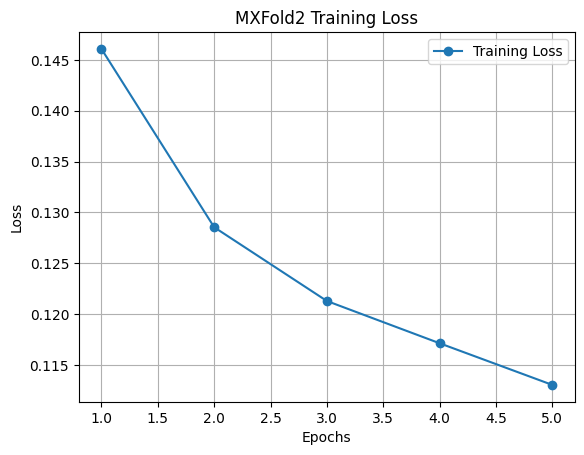

In [ ]:
import matplotlib.pyplot as plt

# Parse loss values from the training log
losses = []
with open("training_log_test.txt", "r") as f:
    for line in f:
      print(line)
      loss = float(line.split("Loss:")[1].split("\t")[0].strip())
      # print(loss)
      losses.append(loss)

# Plot the loss values
epochs = range(1, len(losses) + 1)
plt.plot(epochs, losses, marker='o', label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("MXFold2 Training Loss")
plt.legend()
plt.grid(True)
plt.show()